
# Dark Theme Pizza (Percentiles)

Here we plot a pizza chart with a dark theme.


In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd 
import matplotlib as mpl
import os
from matplotlib import font_manager as fm, rcParams
from matplotlib.font_manager import FontProperties

from mplsoccer import PyPizza, add_image, FontManager

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

## Load Image
Load a cropped image of Sander Berge.



In [3]:
URL = "https://github.com/ArunMathivanan/ProjectImages/blob/main/Manuel-Ugarte_pf.png?raw=true"
sb_cropped = Image.open(urlopen(URL))

## Load Player Stats

In [4]:
player_fbref_link = "https://fbref.com/en/players/c9817014/scout/365_m1/Manuel-Ugarte-Ribeiro-Scouting-Report"

df = pd.read_html(player_fbref_link)
df = df[2]
df = df[:].values
df = pd.DataFrame(df[:,1:3], index=df[:,0])
df = df.drop(['Shooting', 'Statistic'], axis = 0)

df = df.T
df = df.dropna(axis= 1)
df = df.loc[:,~df.columns.duplicated()]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [5]:
df

,Goals,Assists,Goals + Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG: Expected Goals,npxG: Non-Penalty xG,...,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won
0,0.00,0.08,0.08,0.00,0.00,0.00,0.27,0.00,0.03,0.03,...,2.21,1.39,0.00,0.04,0.00,0.00,8.14,0.66,0.70,48.6%
1,11,47,21,13,44,43,37,59,14,15,...,8,67,82,92,62,52,99,37,71,48


In [17]:
print(df.columns.tolist())

['Goals', 'Assists', 'Goals + Assists', 'Non-Penalty Goals', 'Penalty Kicks Made', 'Penalty Kicks Attempted', 'Yellow Cards', 'Red Cards', 'xG: Expected Goals', 'npxG: Non-Penalty xG', 'xAG: Exp. Assisted Goals', 'npxG + xAG', 'Progressive Carries', 'Progressive Passes', 'Progressive Passes Rec', 'Shots Total', 'Shots on Target', 'Shots on Target %', 'Goals/Shot', 'Goals/Shot on Target', 'Average Shot Distance', 'Shots from Free Kicks', 'npxG/Shot', 'Goals - xG', 'Non-Penalty Goals - npxG', 'Passing', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Total Passing Distance', 'Progressive Passing Distance', 'Passes Completed (Short)', 'Passes Attempted (Short)', 'Pass Completion % (Short)', 'Passes Completed (Medium)', 'Passes Attempted (Medium)', 'Pass Completion % (Medium)', 'Passes Completed (Long)', 'Passes Attempted (Long)', 'Pass Completion % (Long)', 'xA: Expected Assists', 'Key Passes', 'Passes into Final Third', 'Passes into Penalty Area', 'Crosses into Penalty Area

In [6]:
# Define parameters
PlayerParams = ['Non-Penalty Goals', 'npxG: Non-Penalty xG', 'xAG: Exp. Assisted Goals', 'Shot-Creating Actions',  
                          'Passes into Penalty Area','Touches', 'Progressive Passes', 'Progressive Carries', 'Passes into Final Third', 
                          'Carries into Final Third','Fouls Committed','Tackles','Interceptions','Ball Recoveries','% of Aerials Won']

#getting rows values
PlayerPercintile=[]   
for x in PlayerParams:
    
    PlayerPercintile.append(int(df[x][1]))

values = PlayerPercintile

## Dark Theme
Below is an example code for dark theme.

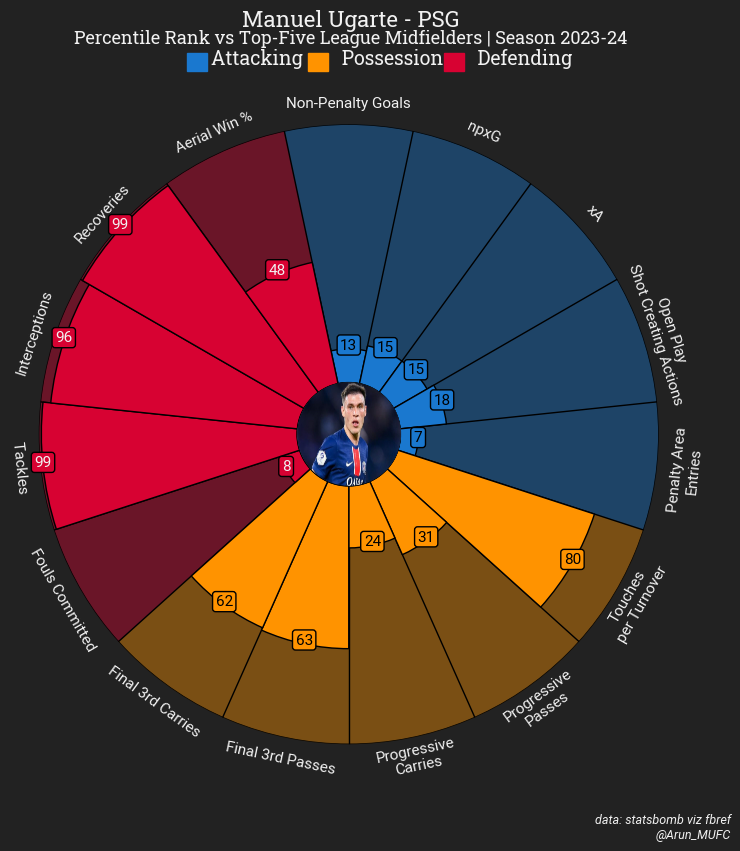

In [7]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "\nPenalty Area\nEntries", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 3rd Passes", "Final 3rd Carries", "Fouls Committed",
          "Tackles ", "Interceptions", "Recoveries", "Aerial Win %"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
#values = [70, 77, 74, 68, 60, 96, 89, 97, 92, 94, 16, 19, 56, 53, 94]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Manuel Ugarte - PSG", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Midfielders | Season 2023-24",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "@Arun_MUFC"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    sb_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()